In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 # use your own url
df = pd.read_csv('20230605_synthetic_T1DB_dataset.csv')


In [3]:
df.head()

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,subject
0,2023-06-04 00:00:00,138.56,155.333949,0.0,0.021125,0.0,1.510902,1.510902,adult#001
1,2023-06-04 00:03:00,138.56,151.122022,0.0,0.021125,0.0,1.510902,1.510902,adult#001
2,2023-06-04 00:06:00,138.56,148.779373,0.0,0.021125,0.0,1.510902,1.510902,adult#001
3,2023-06-04 00:09:00,138.56,147.012710,0.0,0.021125,0.0,1.510902,1.510902,adult#001
4,2023-06-04 00:12:00,138.56,145.648950,0.0,0.021125,0.0,1.510902,1.510902,adult#001


In [4]:
df.shape

(48010, 9)

In [57]:
df['CHO'].fillna(df['CHO'].mean(), inplace=True)
df['insulin'].fillna(df['insulin'].mean(), inplace=True)


In [5]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df.dtypes

Time       datetime64[ns]
BG                float64
CGM               float64
CHO               float64
insulin           float64
LBGI              float64
HBGI              float64
Risk              float64
subject            object
dtype: object

In [6]:
df.head()

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,subject
0,2023-06-04 00:00:00,138.56,155.333949,0.0,0.021125,0.0,1.510902,1.510902,adult#001
1,2023-06-04 00:03:00,138.56,151.122022,0.0,0.021125,0.0,1.510902,1.510902,adult#001
2,2023-06-04 00:06:00,138.56,148.779373,0.0,0.021125,0.0,1.510902,1.510902,adult#001
3,2023-06-04 00:09:00,138.56,147.012710,0.0,0.021125,0.0,1.510902,1.510902,adult#001
4,2023-06-04 00:12:00,138.56,145.648950,0.0,0.021125,0.0,1.510902,1.510902,adult#001


In [7]:
df.describe()

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk
count,4.801000e+04,48010.000000,48000.000000,48000.000000,48010.000000,48010.000000,48010.000000
mean,1.080453e+02,112.083051,0.132007,0.038007,2.740597,2.037124,4.777721
std,5.439667e+01,49.761678,1.689949,0.235979,9.290814,4.335090,9.692581
min,-4.550876e-13,39.000000,0.000000,0.014800,0.000000,0.000000,0.000000
25%,7.874895e+01,77.083805,0.000000,0.018900,0.000000,0.000000,0.307901
50%,1.053860e+02,106.395172,0.000000,0.021125,0.000000,0.000000,1.965544
75%,1.411451e+02,142.243407,0.000000,0.022858,2.104106,1.791685,5.953451
max,3.006853e+02,323.897864,34.666667,6.816975,642.687222,34.111388,642.687222


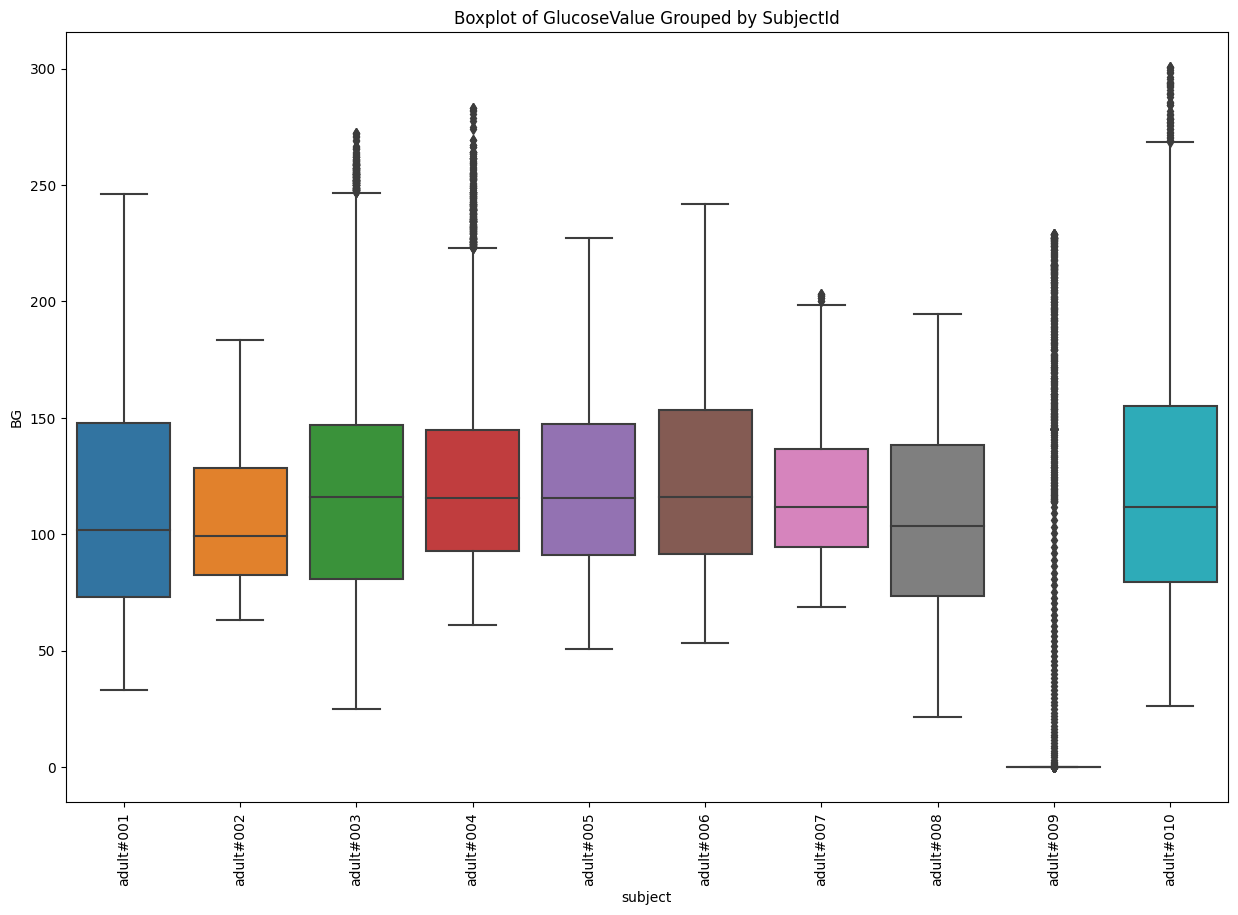

In [8]:


# Plotting
plt.figure(figsize=(15,10))
sns.boxplot(x='subject', y='BG', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of GlucoseValue Grouped by SubjectId')
plt.show()

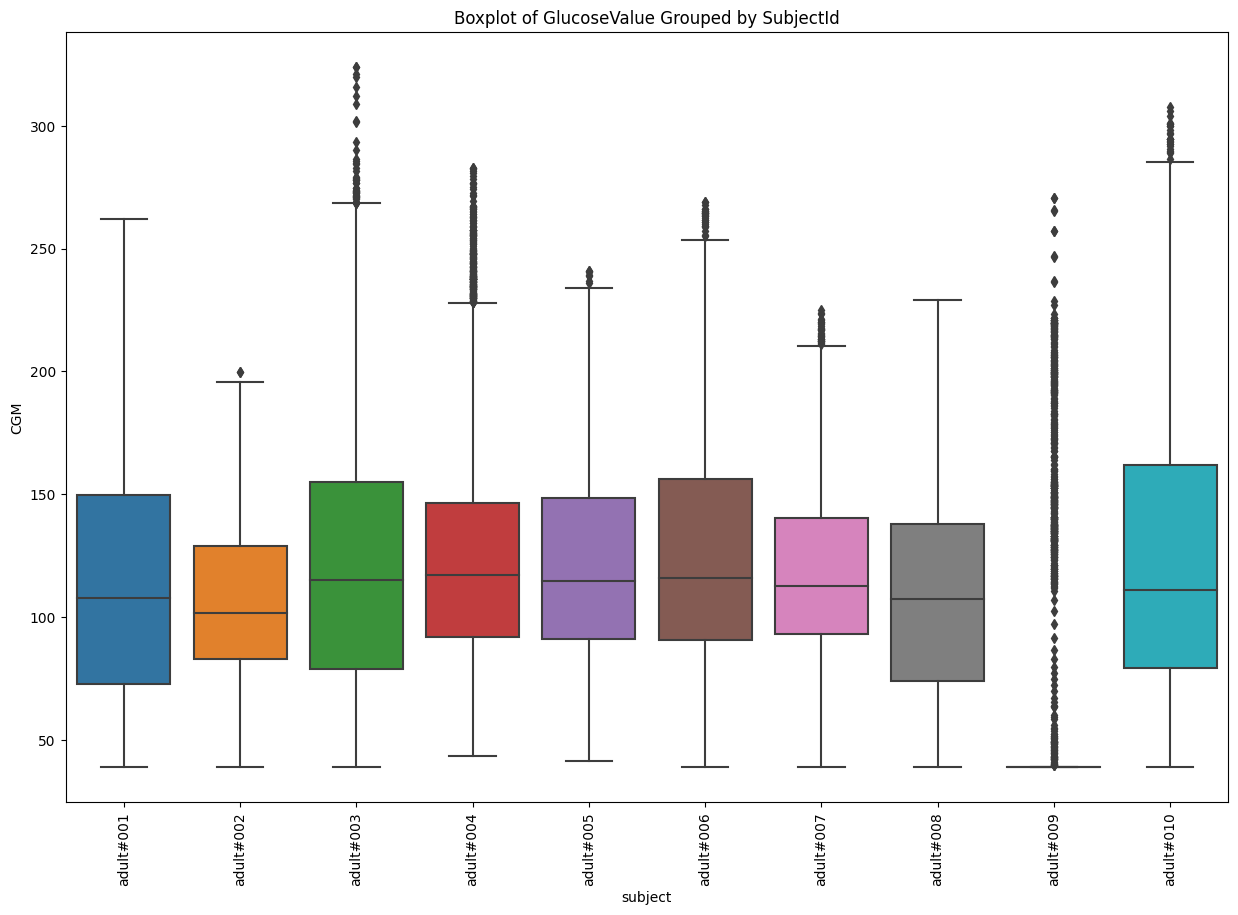

In [9]:

# Plotting
plt.figure(figsize=(15,10))
sns.boxplot(x='subject', y='CGM', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of GlucoseValue Grouped by SubjectId')
plt.show()

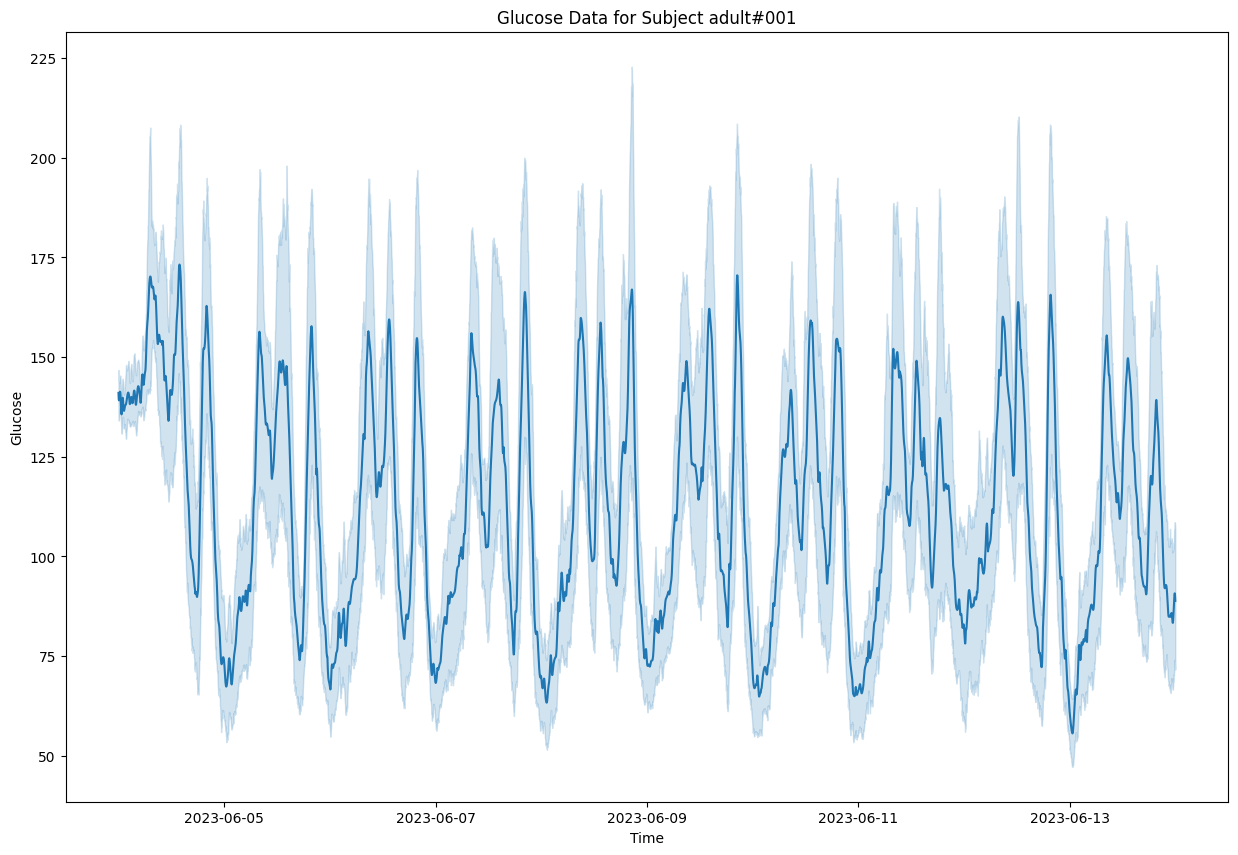

In [10]:
subject_id = 'adult#001'

# Filter the data to include only the glucose data for the specified subject ID
data_filtered = df[df['subject'] == subject_id]

# Plotting
plt.figure(figsize=(15, 10))
sns.lineplot(x='Time', y='CGM', data=df)
plt.title('Glucose Data for Subject {}'.format(subject_id))
plt.xlabel('Time')
plt.ylabel('Glucose')
plt.show()


In [11]:
import plotly.express as px

subject_id = 'adult#001'

# Filter the data to only include the IDs of interest
data_filtered = df[df['subject'].isin([subject_id])]

# Plotting with Plotly
fig = px.line(data_filtered, x='Time', y='CGM', color='subject', title='Glucose Value over Time for Selected Subject Id')

fig.show()


In [12]:
import plotly.graph_objects as go

subject_id = 'adult#002'

# Filter the data to only include the ID of interest
data_filtered = df[df['subject'] == subject_id]

# Create a trace for glucose
trace_bg = go.Scatter(x=data_filtered['Time'], y=data_filtered['CGM'], mode='lines', name='CGM')

data = [trace_bg]

# Layout for the plot
layout = go.Layout(title='Glucose and CHO over Time for Subject {}'.format(subject_id),
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='CGM'))

fig = go.Figure(data=data, layout=layout)

# Adding CHO annotations to the plot
for i in range(len(data_filtered)):
    if data_filtered['CHO'].iloc[i] != 0:  # Only annotate non-zero CHO values
        fig.add_annotation(x=data_filtered['Time'].iloc[i], y=data_filtered['CGM'].iloc[i] + 1,  # Add 1 to position label above CGM value
                           text=str(data_filtered['CHO'].iloc[i]),
                           showarrow=False, 
                           font=dict(size=8))

fig.show()



In [13]:
import plotly.graph_objects as go

subject_id = 'adult#002'

# Filter the data to only include the ID of interest
data_filtered = df[df['subject'] == subject_id]

# Create a trace for glucose
trace_bg = go.Scatter(x=data_filtered['Time'], y=data_filtered['BG'], 
                      mode='lines', name='BG')

# Create a trace for CHO
trace_cho = go.Scatter(x=data_filtered['Time'], y=data_filtered['CHO'], 
                       mode='lines', name='CHO', 
                       yaxis='y2')

data = [trace_bg, trace_cho]

# Layout for the plot
layout = go.Layout(title='Glucose and CHO over Time for Subject {}'.format(subject_id),
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='BG'),
                   yaxis2=dict(title='CHO', 
                               overlaying='y', 
                               side='right'))

fig = go.Figure(data=data, layout=layout)

fig.show()


In [14]:
import plotly.graph_objects as go

subject_id = 'adult#002'

# Filter the data to only include the ID of interest
data_filtered = df[df['subject'] == subject_id]

# Create a trace for glucose
trace_bg = go.Scatter(x=data_filtered['Time'], y=data_filtered['CGM'], 
                      mode='lines', name='CGM')

# Create a trace for CHO
trace_cho = go.Scatter(x=data_filtered['Time'], y=data_filtered['CHO'], 
                       mode='lines', name='CHO', 
                       yaxis='y2')

data = [trace_bg, trace_cho]

# Layout for the plot
layout = go.Layout(title='Glucose and CHO over Time for Subject {}'.format(subject_id),
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='CGM'),
                   yaxis2=dict(title='CHO', 
                               overlaying='y', 
                               side='right'))

fig = go.Figure(data=data, layout=layout)

fig.show()

In [15]:
import plotly.graph_objects as go

subject_id = 'adult#002'

# Filter the data to only include the ID of interest
data_filtered = df[df['subject'] == subject_id]

# Create a trace for glucose
trace_bg = go.Scatter(x=data_filtered['Time'], y=data_filtered['CGM'], 
                      mode='lines', name='CGM')

# Create a trace for CHO
trace_cho = go.Scatter(x=data_filtered['Time'], y=data_filtered['LBGI'], 
                       mode='lines', name='LBGI', 
                       yaxis='y2')

data = [trace_bg, trace_cho]

# Layout for the plot
layout = go.Layout(title='Glucose and CHO over Time for Subject {}'.format(subject_id),
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='CGM'),
                   yaxis2=dict(title='LBGI', 
                               overlaying='y', 
                               side='right'))

fig = go.Figure(data=data, layout=layout)

fig.show()

In [16]:
df.columns

Index(['Time', 'BG', 'CGM', 'CHO', 'insulin', 'LBGI', 'HBGI', 'Risk',
       'subject'],
      dtype='object')

In [17]:
import plotly.graph_objects as go

subject_id = 'adult#002'

# Filter the data to only include the ID of interest
data_filtered = df[df['subject'] == subject_id]

# Create a trace for glucose
trace_bg = go.Scatter(x=data_filtered['Time'], y=data_filtered['CGM'], 
                      mode='lines', name='CGM')

# Create a trace for CHO
trace_cho = go.Scatter(x=data_filtered['Time'], y=data_filtered['HBGI'], 
                       mode='lines', name='HBGI', 
                       yaxis='y2')

data = [trace_bg, trace_cho]

# Layout for the plot
layout = go.Layout(title='Glucose and CHO over Time for Subject {}'.format(subject_id),
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='CGM'),
                   yaxis2=dict(title='HBGI', 
                               overlaying='y', 
                               side='right'))

fig = go.Figure(data=data, layout=layout)

fig.show()

In [18]:
df.head(10)

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,subject
0,2023-06-04 00:00:00,138.560000,155.333949,0.0,0.021125,0.0,1.510902,1.510902,adult#001
1,2023-06-04 00:03:00,138.560000,151.122022,0.0,0.021125,0.0,1.510902,1.510902,adult#001
2,2023-06-04 00:06:00,138.560000,148.779373,0.0,0.021125,0.0,1.510902,1.510902,adult#001
3,2023-06-04 00:09:00,138.560000,147.012710,0.0,0.021125,0.0,1.510902,1.510902,adult#001
4,2023-06-04 00:12:00,138.560000,145.648950,0.0,0.021125,0.0,1.510902,1.510902,adult#001
5,2023-06-04 00:15:00,138.560000,144.515014,0.0,0.021125,0.0,1.510902,1.510902,adult#001
6,2023-06-04 00:18:00,138.560000,143.437821,0.0,0.021125,0.0,1.510902,1.510902,adult#001
7,2023-06-04 00:21:00,138.560000,142.244290,0.0,0.021125,0.0,1.510902,1.510902,adult#001
8,2023-06-04 00:24:00,138.560000,140.761340,0.0,0.021125,0.0,1.510902,1.510902,adult#001
9,2023-06-04 00:27:00,138.559999,138.851288,0.0,0.021125,0.0,1.510902,1.510902,adult#001


In [19]:
df['meal'] = df['CHO'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,subject,meal
0,2023-06-04 00:00:00,138.56,155.333949,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0
1,2023-06-04 00:03:00,138.56,151.122022,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0
2,2023-06-04 00:06:00,138.56,148.779373,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0
3,2023-06-04 00:09:00,138.56,147.012710,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0
4,2023-06-04 00:12:00,138.56,145.648950,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0


In [20]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(['subject', 'Time'])
df['time_mins'] = df.groupby('subject')['Time'].transform(lambda x: (x - x.min()).dt.total_seconds()/60)
df.head()

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,subject,meal,time_mins
0,2023-06-04 00:00:00,138.56,155.333949,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0,0.0
1,2023-06-04 00:03:00,138.56,151.122022,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0,3.0
2,2023-06-04 00:06:00,138.56,148.779373,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0,6.0
3,2023-06-04 00:09:00,138.56,147.012710,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0,9.0
4,2023-06-04 00:12:00,138.56,145.648950,0.0,0.021125,0.0,1.510902,1.510902,adult#001,0,12.0


In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['BG', 'CGM', 'CHO', 'insulin', 'LBGI', 'HBGI', 'Risk']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [108]:
df.head()

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,subject,meal,time_mins
0,2023-06-04 00:00:00,0.460814,0.408336,0.0,0.00093,0.0,0.044293,0.002351,adult#001,0.0,0.0
1,2023-06-04 00:03:00,0.460814,0.393552,0.0,0.00093,0.0,0.044293,0.002351,adult#001,0.0,3.0
2,2023-06-04 00:06:00,0.460814,0.385329,0.0,0.00093,0.0,0.044293,0.002351,adult#001,0.0,6.0
3,2023-06-04 00:09:00,0.460814,0.379128,0.0,0.00093,0.0,0.044293,0.002351,adult#001,0.0,9.0
4,2023-06-04 00:12:00,0.460814,0.374341,0.0,0.00093,0.0,0.044293,0.002351,adult#001,0.0,12.0


In [60]:
def data_tokenization(df, feature_cols=['BG', 'CGM', 'insulin', 'LBGI', 'HBGI', 'Risk', 'time_mins'], 
                      target_cols=['meal'], sequence_length=10):
    """
    Function to tokenize time-series data into matrices for machine learning models.
    
    Parameters:
    df: DataFrame containing the data.
    feature_cols: List of column names to be used as features.
    target_cols: List of column names to be used as targets.
    sequence_length: Size of the time window (in number of rows) to be used for each sequence.

    Returns:
    feature_matrices: 3D numpy array where each element is a matrix of features for a given time window.
    target_matrices: 3D numpy array where each element is a matrix of target values for a given time window.
    """
    feature_matrices = []
    target_matrices = []

    # Ensure data length is a multiple of sequence_length by trimming end
    trimmed_length = len(df) // sequence_length * sequence_length
    df = df.iloc[:trimmed_length]

    for i in range(0, len(df), sequence_length):
        feature_matrix = df[feature_cols].iloc[i:i+sequence_length].values.T
        target_matrix = df[target_cols].iloc[i:i+sequence_length].values.T
        feature_matrices.append(feature_matrix)
        target_matrices.append(target_matrix)

    # Convert list of matrices to numpy array
    feature_matrices_np = np.array(feature_matrices)
    target_matrices_np = np.array(target_matrices)

    return feature_matrices_np, target_matrices_np


In [109]:
import numpy as np

def data_tokenization(df, feature_cols=['BG', 'CGM', 'insulin', 'LBGI', 'HBGI', 'Risk', 'time_mins'],
                      target_cols=['meal'], sequence_length=10):
    """
    Function to tokenize time-series data into matrices for machine learning models.
    
    Parameters:
    df: DataFrame containing the data.
    feature_cols: List of column names to be used as features.
    target_cols: List of column names to be used as targets.
    sequence_length: Size of the time window (in number of rows) to be used for each sequence.

    Returns:
    feature_matrices: 3D numpy array where each element is a matrix of features for a given time window.
    target_matrices: 2D numpy array where each element is the maximum target value for a given time window.
    """
    feature_matrices = []
    target_matrices = []

    # Ensure data length is a multiple of sequence_length by trimming end
    trimmed_length = len(df) // sequence_length * sequence_length
    df = df.iloc[:trimmed_length]

    for i in range(0, len(df), sequence_length):
        feature_matrix = df[feature_cols].iloc[i:i+sequence_length].values.T
        target_matrix = np.max(df[target_cols].iloc[i:i+sequence_length].values, axis=0)
        feature_matrices.append(feature_matrix)
        target_matrices.append(target_matrix)

    # Convert list of matrices to numpy array
    feature_matrices_np = np.array(feature_matrices)
    target_matrices_np = np.array(target_matrices)

    return feature_matrices_np, target_matrices_np


In [110]:
feature_matrices, target_matrices = data_tokenization(df, sequence_length=10)


In [111]:
feature_matrices.shape

(4801, 7, 10)

In [112]:
target_matrices.shape

(4801, 1)

In [113]:
target_matrices[0]

array([0.])

In [126]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrices, target_matrices, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print('Train set shapes:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Test set shapes:')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


Train set shapes:
X_train: (3840, 7, 10)
y_train: (3840, 1)
Test set shapes:
X_test: (961, 7, 10)
y_test: (961, 1)


In [ ]:
import torch
from torch import nn

# Assuming your data is in the format (num_features, sequence_length, num_samples)
# Assuming your data is in the format (num_samples, num_features, sequence_length)
X_train = X_train.permute(2, 0, 1)
X_test = X_test.permute(2, 0, 1)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

y_train = torch.tensor(y_train, dtype=torch.float32)

y_test = torch.tensor(y_test, dtype=torch.float32)

print("Shape of X_train after permutation: ", X_train.shape)
print("Shape of X_test after permutation: ", X_test.shape)

class SimpleTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers):
        super().__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        self.decoder = nn.Linear(d_model, 1)  # Adjust the output dimension here

    # def forward(self, src):
    #     out = self.transformer_encoder(src)
    #     out = self.decoder(out[-1])  # We only care about the last timesteps
    #     return out

    def forward(self, src):
      out = self.transformer_encoder(src)
      out = out.mean(dim=0)  # average along the sequence dimension
      out = self.decoder(out)
      return out




In [220]:
# Initialize the model
d_model = 7 # Set d_model to the number of features
nhead = 7  # Set nhead as desired
num_layers = 7  # Set num_layers as desired
model = SimpleTransformer(d_model, nhead, num_layers)


In [221]:
# Calculate class weights
class_counts = np.bincount(y_train.numpy().astype(int).flatten())
pos_weight = class_counts[0] / class_counts[1]  # assuming that 1 is the positive class and 0 is the negative

# Convert to tensor
pos_weight = torch.tensor([pos_weight], dtype=torch.float32)

# Initialize the weighted loss function
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
threshold = 0.5  # threshold for binary classification

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_output = model(X_test)
        test_loss = criterion(test_output.squeeze(), y_test)

        # Calculate accuracy
        train_predictions = (output.squeeze() >= threshold).long()
        train_accuracy = (train_predictions == y_train).float().mean().item()
        
        test_predictions = (test_output.squeeze() >= threshold).long()
        test_accuracy = (test_predictions == y_test).float().mean().item()

        print('Epoch: {}, Loss: {:.4f}, Test Loss: {:.4f}, Train Accuracy: {:.4f}, Test Accuracy: {:.4f}'.format(epoch, loss.item(), test_loss.item(), train_accuracy, test_accuracy))



Epoch: 0, Loss: 1.3147, Test Loss: 1.3921, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 1, Loss: 1.2988, Test Loss: 1.3906, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 2, Loss: 1.2879, Test Loss: 1.3939, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 3, Loss: 1.2833, Test Loss: 1.4002, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 4, Loss: 1.2803, Test Loss: 1.4073, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 5, Loss: 1.2807, Test Loss: 1.4125, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 6, Loss: 1.2835, Test Loss: 1.4150, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 7, Loss: 1.2838, Test Loss: 1.4154, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 8, Loss: 1.2842, Test Loss: 1.4143, Train Accuracy: 0.9240, Test Accuracy: 0.9084
Epoch: 9, Loss: 1.2835, Test Loss: 1.4125, Train Accuracy: 0.9240, Test Accuracy: 0.9084


Confusion Matrix:
[[873   0]
 [ 88   0]]


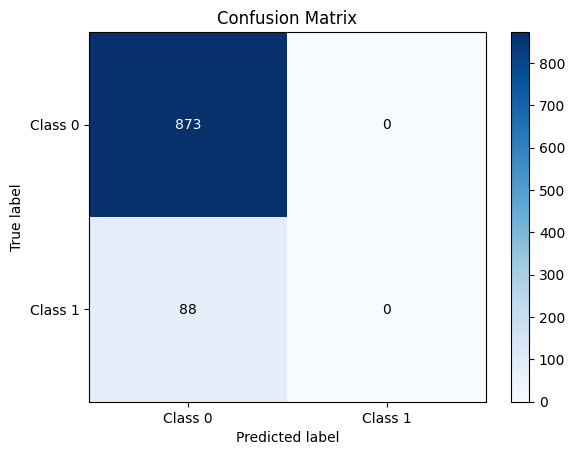

In [222]:
# Calculate confusion matrix
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()  # Remove the extra dimension
    pred_labels = (predictions >= threshold).long()
    true_labels = (y_test.squeeze() >= threshold).long()
    cm = confusion_matrix(true_labels, pred_labels)
    print('Confusion Matrix:')
    print(cm)

# Plot confusion matrix
labels = ['Class 0', 'Class 1']
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

Confusion Matrix for Training Data:
[[3548    0]
 [ 292    0]]


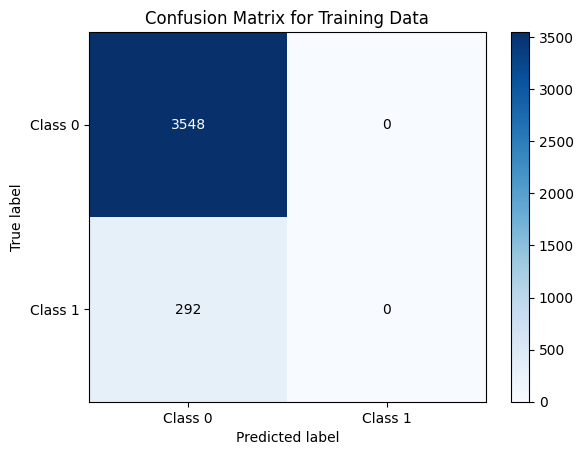

In [223]:
# Calculate confusion matrix for training data
model.eval()
with torch.no_grad():
    train_predictions = model(X_train).squeeze()  # Remove the extra dimension
    train_pred_labels = (train_predictions >= threshold).long()
    train_true_labels = (y_train.squeeze() >= threshold).long()
    cm_train = confusion_matrix(train_true_labels, train_pred_labels)
    print('Confusion Matrix for Training Data:')
    print(cm_train)

# Plot confusion matrix for training data
labels = ['Class 0', 'Class 1']
fig, ax = plt.subplots()
im = ax.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_train.shape[1]),
       yticks=np.arange(cm_train.shape[0]),
       xticklabels=labels, yticklabels=labels,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix for Training Data',
       aspect='auto')

# Loop over data dimensions and create text annotations
thresh = cm_train.max() / 2.
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(j, i, format(cm_train[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_train[i, j] > thresh else "black")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for the training set
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

# Calculate metrics for the test set
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print('Train Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}'.format(train_precision, train_recall, train_f1))
print('Test Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}'.format(test_precision, test_recall, test_f1))
